# Notebook 5 - Orthorectify GOES data using goes-ortho

This tests Steven's orthorectification code from goes-ortho. Copied from `goes-ortho/docs/examples
/goes-orthorectify.ipynb` on github.

The input is raw GOES ABI netcdf files and the output is corrected netcdfs. These can then be converted to zarr and processed into RGB composites as I have done with previous code (see `/processing/00_goes_rad_corrections.ipynb`)

In [3]:
import goes_ortho
import xarray as xr
import matplotlib.pyplot as plt

We will use the goes_ortho.ortho() function to orthorectify and clip a GOES ABI image for an area within lat/lon bounds we'll specify.

First, provide a filepath to the GOES ABI image we want to orthorectify:

In [4]:
goes_image_path = "/storage/cdalden/goes/washington/goes16/2022/8/4/ABI-L1b-RadC/16/C13/OR_ABI-L1b-RadC-M6C13_G16_s20222161601175_e20222161603559_c20222161604015.nc"

We can specify a list of the variables in the dataset that we want to include in the orthorectified dataset:

In [5]:
data_vars = ["Rad"]

And then we need to provide a new filepath and filename for where to save the final orthorectified dataset:

In [6]:
new_goes_filename = "./OR_ABI-L1b-RadC-M6C13_G16_s20222161601175_e20222161603559_c20222161604015_ortho.nc"

Finally, specify the lat/lon bounds for the area we want to orthorectify, like (min lon, min lat, max lon, max lat):

In [7]:
bounds = (-124, 48, -121, 49)

Run the function!

Note: goes_ortho.ortho does not exist as described in the example notebook, using goes_ortho.orthorectify.ortho instead

In [8]:
api_key = "41d14aae7e761c0de3e8f99aa4fd24d9"

goes_ortho.orthorectify.ortho(
    goes_image_path,
    data_vars,
    bounds,
    api_key,
    new_goes_filename,
    dem_filepath=None,
    demtype="SRTMGL3",
    keep_dem=True,
)

https://portal.opentopography.org/API/globaldem?demtype=SRTMGL3&west=-124&south=48&east=-121&north=49&outputFormat=GTiff&API_Key=41d14aae7e761c0de3e8f99aa4fd24d9
/home/cdalden/miniforge3/envs/goesenv/bin/gdalwarp -r cubic -co COMPRESS=LZW -co TILED=YES -co BIGTIFF=IF_SAFER -tr 30 30 -t_srs '+proj=lonlat +datum=GRS80' temp_SRTMGL3_DEM.tif temp_SRTMGL3_DEM_proj.tif
/home/cdalden/miniforge3/envs/goesenv/bin/gdalwarp -r cubic -co COMPRESS=LZW -co TILED=YES -co BIGTIFF=IF_SAFER -tr 30 30 -t_srs '+proj=lonlat +datum=GRS80' temp_SRTMGL3_DEM.tif temp_SRTMGL3_DEM_proj.tif


ERROR 1: PROJ: proj_create: Error 1027 (Invalid value for an argument): Unknown value for datum
ERROR 1: Invalid SRS for -t_srs
Usage: gdalwarp [--help] [--long-usage] [--help-general]
                [--quiet] [-overwrite] [-of <output_format>]
                [-co <NAME>=<VALUE>]... [-s_srs <srs_def>] [-t_srs <srs_def>]
                [[-srcalpha]|[-nosrcalpha]]
                [-dstalpha] [-tr <xres> <yres>|square] [-ts <width> <height>]
                [-te <xmin> <ymin> <xmax> <ymax>] [-te_srs <srs_def>]
                [-r near|bilinear|cubic|cubicspline|lanczos|average|rms|mode|min|max|med|q1|q3|sum]
                [-ot Byte|Int8|[U]Int{16|32|64}|CInt{16|32}|[C]Float{32|64}]
                <src_dataset_name>... <dst_dataset_name>

Advanced options:
                [-wo <NAME>=<VALUE>]... [-multi] [-s_coord_epoch <epoch>]
                [-t_coord_epoch <epoch>] [-ct <string>]
                [[-tps]|[-rpc]|[-geoloc]]
                [-order <1|2|3>] [-refine_gcps <tolerance> 

Open the new file we created, and plot it:

In [9]:
ds = xr.open_dataset(new_goes_filename)

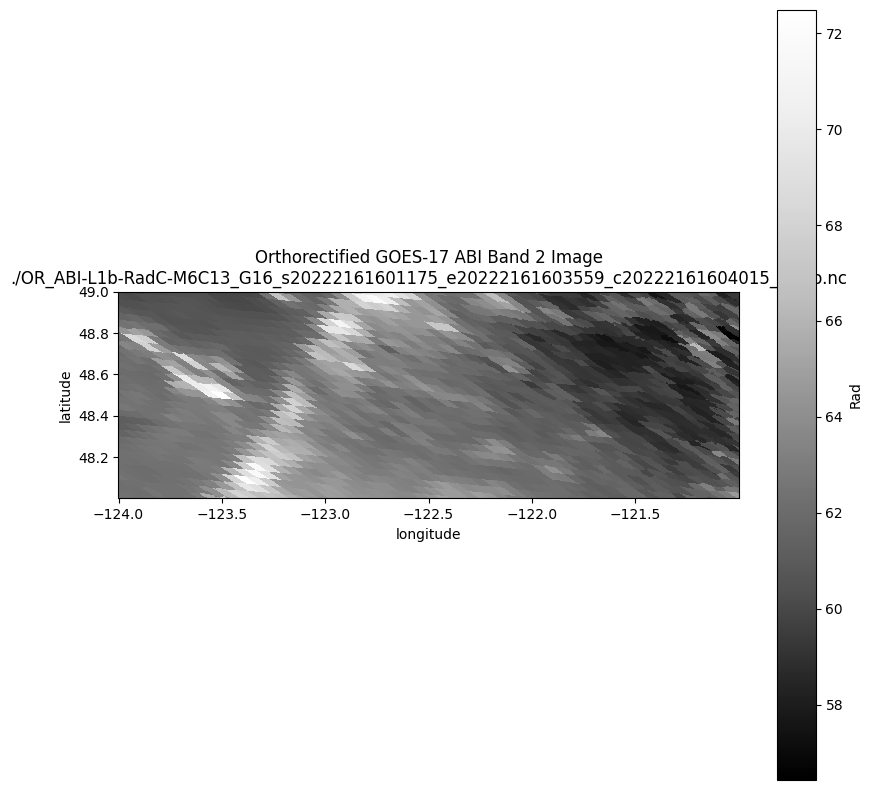

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect(1)
ds.Rad.plot(ax=ax, cmap="Greys_r")
ax.set_title("Orthorectified GOES-17 ABI Band 2 Image\n{}".format(new_goes_filename));